In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/ICT 이노베이션 스퀘어/05 11/datasets/cats_and_dogs_small

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/ICT 이노베이션 스퀘어/05 11/datasets/cats_and_dogs_small'
/content


In [2]:
!ls

drive  sample_data


In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import load_model

In [7]:
VGG = load_model('/content/drive/MyDrive/Colab Notebooks/ICT 이노베이션 스퀘어/05 12 INCEPTION, AUGMENTATION/newvgg_puppy.h5')

In [8]:
VGG.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
pip install flickrapi

     |████████████████████████████████| 54 kB 2.7 MB/s 


In [10]:
from flickrapi import FlickrAPI

FLICKER_KEY = '505e8c2b05e8b5aa51766a43fc4bc7a7'
FLICKER_SECRET = '46b3ef2f43b04ac6'

flickr = FlickrAPI(FLICKER_KEY, FLICKER_SECRET, format='parsed-json')
extras='url_s'
cats = flickr.photos.search(text='doggy', per_page=5, extras=extras)
photos = cats['photos']

In [11]:
import numpy as np
import urllib
import cv2

def url_to_image(url):
  # python 2
  # resp = urllib.urlopen(url)
  
  # python 3
  resp = urllib.request.urlopen(url)
  
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

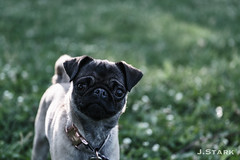

In [12]:
from google.colab.patches import cv2_imshow

image_original_url = photos['photo'][4]['url_s']

image_temp = url_to_image(image_original_url)
cv2_imshow(image_temp)

In [13]:
resized_image = cv2.resize(image_temp, (224, 224))
resized_image = np.expand_dims(resized_image, axis=0)
print (resized_image.shape)

(1, 224, 224, 3)


In [14]:
result = VGG.predict(resized_image)

In [15]:
result

array([[0., 1.]], dtype=float32)

In [16]:
np.argmax(result)

1

In [17]:
temp = [0.00904351, 0.9909565]

In [18]:
test = np.argmax(temp)

In [19]:
test

1